In [131]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [37]:
cd /content/drive/My Drive/Colab Notebooks

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-8f2c16bbbab1>", line 1, in <module>
    get_ipython().magic('cd /content/drive/My Drive/Colab Notebooks')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handlin

OSError: ignored

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy import signal
from PIL import Image
import argparse

# Copy the path of the folder that contains this notebook using the file navigation on the left:
# Ex. /content/drive/My\ Drive/CIS 581-Online/Canny Edge Project/Learner Code and Images/Code
sys.path.append('')

# import functions
#from helpers import interp2

# Tests and Visualization

In [132]:
def Test_script(I, E):
    test_pass = True

    # E should be 2D matrix
    if E.ndim != 2:
      print('ERROR: Incorrect Edge map dimension! \n')
      print(E.ndim)
      test_pass = False
    # end if

    # E should have same size with original image
    nr_I, nc_I = I.shape[0], I.shape[1]
    nr_E, nc_E = E.shape[0], E.shape[1]

    if nr_I != nr_E or nc_I != nc_E:
      print('ERROR: Edge map size has changed during operations! \n')
      test_pass = False
    # end if

    # E should be a binary matrix so that element should be either 1 or 0
    numEle = E.size
    numOnes, numZeros = E[E == 1].size, E[E == 0].size

    if numEle != (numOnes + numZeros):
      print('ERROR: Edge map is not binary one! \n')
      test_pass = False
    # end if

    if test_pass:
      print('Shape Test Passed! \n')
    else:
      print('Shape Test Failed! \n')

    return test_pass

In [133]:
'''
  Derivatives visualzation function
'''
def visDerivatives(I_gray, Mag, Magx, Magy):
    fig, (Ax0, Ax1, Ax2, Ax3) = plt.subplots(1, 4, figsize = (20, 8))

    Ax0.imshow(Mag, cmap='gray', interpolation='nearest')
    Ax0.axis('off')
    Ax0.set_title('Gradient Magnitude')

    Ax1.imshow(Magx, cmap='gray', interpolation='nearest')
    Ax1.axis('off')
    Ax1.set_title('Gradient Magnitude (x axis)')
    
    Ax2.imshow(Magy, cmap='gray', interpolation='nearest')
    Ax2.axis('off')
    Ax2.set_title('Gradient Magnitude (y axis)')

    # plot gradient orientation
    Mag_vec = Mag.transpose().reshape(1, Mag.shape[0] * Mag.shape[1]) 
    hist, bin_edge = np.histogram(Mag_vec.transpose(), 100)

    ind_array = np.array(np.where( (np.cumsum(hist).astype(float) / hist.sum()) < 0.95))
    thr = bin_edge[ind_array[0, -1]]

    ind_remove = np.where(np.abs(Mag) < thr)
    Magx[ind_remove] = 0
    Magy[ind_remove] = 0

    X, Y = np.meshgrid(np.arange(0, Mag.shape[1], 1), np.arange(0, Mag.shape[0], 1))
    Ori = np.arctan2(Magy, Magx)
    ori = Ax3.imshow(Ori, cmap='hsv')
    Ax3.axis('off')
    Ax3.set_title('Gradient Orientation')
    fig.colorbar(ori, ax=Ax3, )
    


'''
  Edge detection result visualization function
'''
def visCannyEdge(Im_raw, M, E):
    # plot image
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (12, 12))

    # plot original image
    ax0.imshow(Im_raw)
    ax0.axis("off")
    ax0.set_title('Raw image')

    # plot edge detection result
    ax1.imshow(M, cmap='gray', interpolation='nearest')
    ax1.axis("off")
    ax1.set_title('Non-Max Suppression Result')

    # plot original image
    ax2.imshow(E, cmap='gray', interpolation='nearest')
    ax2.axis("off") 
    ax2.set_title('Canny Edge Detection')

# Functions

In [134]:
'''
  Convert RGB image to gray one manually
  - Input I_rgb: 3-dimensional rgb image
  - Output I_gray: 2-dimensional grayscale image
'''
def rgb2gray(I_rgb):
    r, g, b = I_rgb[:, :, 0], I_rgb[:, :, 1], I_rgb[:, :, 2]
    I_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return I_gray

In [135]:
def findDerivatives(I_gray):
    '''
    File clarification:
        Compute gradient information of the input grayscale image
        - Input I_gray: H x W matrix as image
        - Output Mag: H x W matrix represents the magnitude of derivatives
        - Output Magx: H x W matrix represents the magnitude of derivatives along x-axis
        - Output Magy: H x W matrix represents the magnitude of derivatives along y-axis
        - Output Ori: H x W matrix represents the orientation of derivatives
    '''
    # TODO: complete function

    G = [[2.0/159.0, 4.0/159.0, 5.0/159.0, 4.0/159.0, 2.0/159.0], 
       [4.0/159.0, 9.0/159.0, 12.0/159.0, 9.0/159.0, 4.0/159.0], 
       [5.0/159.0, 12.0/159.0, 15.0/159.0, 12.0/159.0, 5.0/159.0],
       [4.0/159.0, 9.0/159.0, 12.0/159.0, 9.0/159.0, 4.0/159.0],
       [2.0/159.0, 4.0/159.0, 5.0/159.0, 4.0/159.0, 2.0/159.0]]
    

    # G2 = np.array([[2.0, 4.0, 5.0, 4.0, 2.0], [4.0, 9.0, 12.0, 9.0, 4.0], [5.0, 12.0, 15.0, 12.0, 5.0], [4.0, 9.0, 12.0, 9.0, 4.0], [2.0, 4.0, 5.0, 4.0, 2.0]])
    
    # G2 = (1/159)*G2

    # print(G - G2)

    


    # dx, dy = np.gradient(G, axis = (1,0))
    dx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    dy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    # print(dx.shape,dy.shape)
    dx = signal.convolve2d(G, dx,'same')
    dy = signal.convolve2d(G, dy,'same')
    Magx = signal.convolve2d(I_gray, dx,'same')
    Magy = signal.convolve2d(I_gray, dy,'same')


    Mag = np.sqrt(Magx*Magx + Magy*Magy);
    Ori = np.arctan2(Magy, Magx, out=None)  #*(180/ np.pi)

    return Mag,Magx,Magy,Ori

    pass

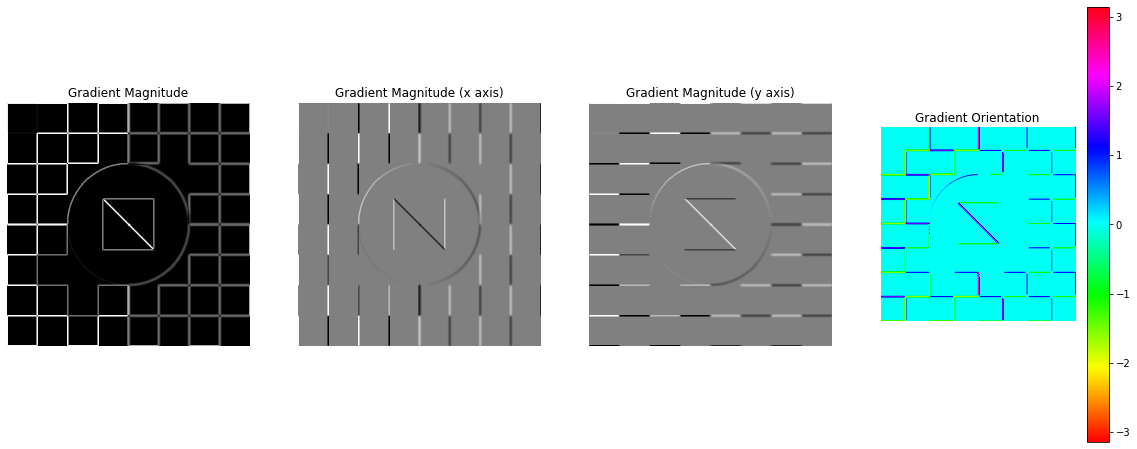

In [136]:
I = plt.imread('/content/drive/MyDrive/CannyEdge/Code/Images/I1.jpg')
Mag, Magx, Magy, Ori = findDerivatives(I)
visDerivatives(I, Mag, Magx, Magy)

In [137]:
## Test ##

# you may need to change the path to I1.jpg under Images folder
I = plt.imread('/content/drive/MyDrive/CannyEdge/Code/Images/I1.jpg')
Mag, Magx, Magy, Ori = findDerivatives(I)
assert np.allclose(Mag, np.load('/content/drive/MyDrive/CannyEdge/Code/Mag.npy'))
assert np.allclose(Magx, np.load('/content/drive/MyDrive/CannyEdge/Code/Magx.npy'))
assert np.allclose(Magy, np.load('/content/drive/MyDrive/CannyEdge/Code/Magy.npy'))
assert np.allclose(Ori, np.load('//content/drive/MyDrive/CannyEdge/Code/Ori.npy'))

In [138]:
def interp2(v, xq, yq):

	if len(xq.shape) == 2 or len(yq.shape) == 2:
		dim_input = 2
		q_h = xq.shape[0]
		q_w = xq.shape[1]
		xq = xq.flatten()
		yq = yq.flatten()

	h = v.shape[0]
	w = v.shape[1]
	if xq.shape != yq.shape:
		raise 'query coordinates Xq Yq should have same shape'

	x_floor = np.floor(xq).astype(np.int32)
	y_floor = np.floor(yq).astype(np.int32)
	x_ceil = np.ceil(xq).astype(np.int32)
	y_ceil = np.ceil(yq).astype(np.int32)

	x_floor[x_floor < 0] = 0
	y_floor[y_floor < 0] = 0
	x_ceil[x_ceil < 0] = 0
	y_ceil[y_ceil < 0] = 0

	x_floor[x_floor >= w-1] = w-1
	y_floor[y_floor >= h-1] = h-1
	x_ceil[x_ceil >= w-1] = w-1
	y_ceil[y_ceil >= h-1] = h-1

	v1 = v[y_floor, x_floor]
	v2 = v[y_floor, x_ceil]
	v3 = v[y_ceil, x_floor]
	v4 = v[y_ceil, x_ceil]

	lh = yq - y_floor
	lw = xq - x_floor
	hh = 1 - lh
	hw = 1 - lw

	w1 = hh * hw
	w2 = hh * lw
	w3 = lh * hw
	w4 = lh * lw

	interp_val = v1 * w1 + w2 * v2 + w3 * v3 + w4 * v4

	if dim_input == 2:
		return interp_val.reshape(q_h, q_w)
	return interp_val

In [158]:
# from helpers import interp2
def nonMaxSup(Mag, Ori):
    '''
    File clarification:
        Find local maximum edge pixel using NMS along the line of the gradient
        - Input Mag: H x W matrix represents the magnitude of derivatives
        - Input Ori: H x W matrix represents the orientation of derivatives
        - Output M: H x W binary matrix represents the edge map after non-maximum suppression
    '''
    # getting neighbor in the oritention direction

    # using interpolation to get neighbor
    
    # getting neighbor in the opposite of the oritention direction
    
    # perform NMS

    
    nr = Ori.shape[0];
    nc = Ori.shape[1];
    X, Y = np.meshgrid(np.arange(nc), np.arange(nr))

  
    delta_x1 = np.cos(Ori + np.pi) # delta back x-pixel
    delta_x2 = np.cos(Ori) # delta forward x-pixel
    delta_y1 = np.sin(Ori + np.pi) # delta backward y-pixel
    delta_y2 = np.sin(Ori) # delta forward y-pixel

    

  # 3) make a comparison pixel locations for forward and back for all pixel locations
    xf = delta_x2 + np.clip(X+1,0,nc-1)
    # print(delta_x1)
    xb = delta_x1 + np.clip(X-1,0,nc-1)
    yf = delta_y2 + np.clip(Y-1,0,nr-1)
    yb = delta_y1 + np.clip(Y+1,0,nr-1)

  # 4) interpolate the comparison grid to get values for forward and back
    
    Magb = interp2(Mag, xb,  yb)
    Magf = interp2(Mag, xf, yf)

  # 5) compare each direction
    mask = np.logical_and(Mag > Magb, Mag >Magf)
    print(mask)
    return mask


In [107]:
# from numpy.lib.function_base import interp
# def nonMaxSup(Mag, Ori):
#     '''
#     File clarification:
#         Find local maximum edge pixel using NMS along the line of the gradient
#         - Input Mag: H x W matrix represents the magnitude of derivatives
#         - Input Ori: H x W matrix represents the orientation of derivatives
#         - Output M: H x W binary matrix represents the edge map after non-maximum suppression
#     '''
#     """
#     nc, nr = Ori.shape[1], Ori.shape[0]
#     x, y = np.meshgrid(np.arange(nc), np.arange(nr))
    
#     y_down = np.clip(y + 1, 0, nr - 1) 
#     y_up = np.clip(y - 1, 0, nr - 1)
#     x_right = np.clip(x + 1, 0, nc - 1)
#     x_left = np.clip(x - 1, 0, nc - 1)
#     cos_map = np.cos(Ori) + x_right
#     sin_map = np.sin(Ori) + y_up
#     neg_Ori = Ori + np.pi
#     cos_map_neg = np.cos(neg_Ori) + x_left
#     sin_map_neg = np.sin(neg_Ori) + y_down
#     # using interpolation to get neighbor
#     #check to see if they are in bounds
#     neighbor1 = interp2(Mag, cos_map, sin_map)
#     neighbor2 = interp2(Mag, cos_map_neg, sin_map_neg)
#     print(neighbor1)
#     print(neighbor2)
#     # getting neighbor in the opposite of the oritention direction
    
#     binary_map = np.logical_and(Mag >= neighbor1, Mag >= neighbor2)
#     return binary_map
#     """
#     nc, nr = Ori.shape[1], Ori.shape[0]
#     x, y = np.meshgrid(np.arange(nc), np.arange(nr))
    
#     y_down = np.clip(y + 1, 0, nr - 1) 
#     y_up = np.clip(y - 1, 0, nr - 1)
#     x_right = np.clip(x + 1, 0, nc - 1)
#     x_left = np.clip(x - 1, 0, nc - 1)

#     cos_map = np.cos(Ori) + x
#     # print(cos_map)
#     cos_map_oob = np.logical_and(np.around(cos_map, 5) >= 0, cos_map <= (nc - 1))
#     sin_map = np.sin(Ori) + y
#     # print(sin_map)
#     sin_map_oob = np.logical_and(np.around(sin_map, 5) >= 0, sin_map <= (nr - 1))
#     forward_oob = np.logical_and(sin_map_oob, cos_map_oob)
#     neighbor1 = interp2(Mag, cos_map, sin_map)
#     # print(neighbor1)
#     N1_trim = np.multiply(neighbor1, forward_oob)
#     # print(N1_trim)

#     cos_map_neg = np.cos(Ori + np.pi) + x
#     cos_map_neg_oob = np.logical_and(np.around(cos_map_neg, 5) >= 0, cos_map_neg <= (nc - 1))
#     sin_map_neg = np.sin(Ori + np.pi) + y
#     sin_map_neg_oob = np.logical_and(np.around(sin_map_neg, 5) >= 0, sin_map_neg <= (nr - 1))
#     backwards_oob = np.logical_and(sin_map_neg_oob, cos_map_neg_oob)
#     neighbor2 = interp2(Mag, cos_map_neg, sin_map_neg)
#     N2_trim = np.multiply(neighbor2, backwards_oob)

#     #print(N1_trim)
#     #print(N2_trim)

#     binary_map = np.logical_and(Mag >= N1_trim, Mag >= N2_trim)
#     return binary_map

In [143]:
## Test ##
Mag = np.array([[0, 2, 12, 16],
                [4, 9, 11, 8],
                [7, 17, 12, 9],
                [0, 19, 21, 17]])
Ori = np.array([[np.pi/2, np.pi/4, 0, np.pi/4],
                [np.pi/4, np.pi/4, np.pi/4, np.pi/2],
                [np.pi/4, 0, np.pi/2, np.pi/4],
                [np.pi/2, np.pi/4, np.pi/2, np.pi/4]])
res = np.array([[False, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [False,  True,  True,  True]])
M = nonMaxSup(Mag, Ori)
assert M.dtype == bool
assert M.shape == Mag.shape
assert np.allclose(M, res)

[[False False False  True]
 [False False  True False]
 [False  True False False]
 [False  True  True  True]]


In [149]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [157]:
import numpy as np
# from interp import interp2


def edgeLink(M, Mag, Ori, low, high):
    '''
    File clarification:
        Use hysteresis to link edges based on high and low magnitude thresholds
        - Input M: H x W logical map after non-max suppression
        - Input Mag: H x W matrix represents the magnitude of gradient
        - Input Ori: H x W matrix represents the orientation of gradient
        - Input low, high: low and high thresholds 
        - Output E: H x W binary matrix represents the final canny edge detection map
    '''
    # suppress pixels whose magnitude is lower than low threshold

    # initial EdgeMap with strong edges

    # compute the edge direction from Ori

    # find neighbors in the edge direction

    # try to link weak edges to strong edges until there is no change
    # threshold_low = np.mean(Mag)
    # threshold_high = np.mean(Mag) +np.std(Mag)
    threshold_low = low
    threshold_high = high
   
    print(threshold_high,low)
    strong_edge_map = np.multiply(M, np.greater(Mag, high))
    weak_edge_map = np.multiply(M, np.logical_and(Mag > low, Mag < threshold_high))
    # print(weak_edge_map)
    # print(strong_edge_map)
  
  # 1) make a mesh grid of all pixel locations
    nr = Ori.shape[0];
    nc = Ori.shape[1];
    X, Y = np.meshgrid(np.arange(nc), np.arange(nr))

    # y_d = np.clip(Y+1,0,nr-1)
    # y_u = np.clip(Y-1,0,nr-1)
    # x_r = np.clip(X+1,0,nc-1)
    # x_l = np.clip(X+1,0,nr-1)
    
    # for x in range(1,2): 
    #   # print(x) 
    #   x=1  
      
    weak_edge_map = np.logical_xor(weak_edge_map, np.logical_and(weak_edge_map, strong_edge_map))
# 2) use the orientation to compute the offset forward and back for each pixel
    x=1
    delta_xb =  (np.cos(Ori - np.pi/2)) # delta back x-pixel
    delta_xf =  (np.cos(Ori + np.pi/2)) # delta forward x-pixel
    delta_yb =  (np.sin(Ori - np.pi/2)) # delta backward y-pixe
    delta_yf =  (np.sin(Ori + np.pi/2)) # delta forward y-pixel
    delta_xb =   np.clip(X-1,0,nc-1)
    delta_xf =  np.clip(X+1,0,nc-1)

    delta_yb =  np.clip(Y+1,0,nr-1)
    delta_yf = np.clip(Y-1,0,nr-1)
    
    
  # print(delta_x1)
# 3) make a comparison pixel locations for forward and back for all pixel locations
    xf = np.multiply(delta_xf, weak_edge_map) 
  
  
    xb = np.multiply(delta_xb, weak_edge_map) 
    yf = np.multiply(delta_yf, weak_edge_map) 
    yb = np.multiply(delta_yb, weak_edge_map) 

    # print(yf)
    # print(yb)

    for y in range(10):
# 4) use weak_edge_map's orientation to see if there is a strong edge in its neighborhood 
      Hb = interp2(strong_edge_map, xb, yb)
      Hf = interp2(strong_edge_map, xf, yf)
      # print(Hf)
      # print(Hb)
      strong_edge_map = np.logical_or(strong_edge_map, Hb)
      strong_edge_map = np.logical_or(strong_edge_map, Hf)

    # print(strong_edge_map)
    return(strong_edge_map)
'''plt.figure()
  ax = plt.subplot(221)
  plt.title('Edge Map')
  plt.imshow(M*Mag, cmap='gray')
  plt.subplot(222, sharex=ax, sharey=ax)
  plt.title('Weak Edge Map')
  plt.imshow(weak_edge_map, cmap='gray')
   
  plt.subplot(223, sharex=ax, sharey=ax)
  plt.title('orig_strong_edge_map')
  plt.imshow(orig_strong_edge_map, cmap='gray')
  plt.subplot(224, sharex=ax, sharey=ax)
  plt.title('strong_edge_map')
  plt.imshow(strong_edge_map, cmap='gray')
  plt.show()
'''
        
    
    
    




    # pass

"plt.figure()\n  ax = plt.subplot(221)\n  plt.title('Edge Map')\n  plt.imshow(M*Mag, cmap='gray')\n  plt.subplot(222, sharex=ax, sharey=ax)\n  plt.title('Weak Edge Map')\n  plt.imshow(weak_edge_map, cmap='gray')\n   \n  plt.subplot(223, sharex=ax, sharey=ax)\n  plt.title('orig_strong_edge_map')\n  plt.imshow(orig_strong_edge_map, cmap='gray')\n  plt.subplot(224, sharex=ax, sharey=ax)\n  plt.title('strong_edge_map')\n  plt.imshow(strong_edge_map, cmap='gray')\n  plt.show()\n"

In [151]:
## Test ##
M = np.array([[True, False, True,  True],
              [False, True,  True, True],
              [True,  True, False, False],
              [False,  True,  True,  True]])
Mag = np.array([[12, 9, 14, 16],
                [4, 11, 40, 18],
                [13, 12, 30, 15],
                [28, 15, 21, 8]])
Ori = np.array([[np.pi/2, np.pi/4, 0, np.pi/4],
                [np.pi/4, np.pi/4, np.pi/4, np.pi/2],
                [np.pi/4, 0, np.pi/2, np.pi/4],
                [np.pi/2, np.pi/4, np.pi/2, np.pi/4]])
res = np.array([[False, False,  True,  True],
       [False,  True,  True,  True],
       [ True,  True, False, False],
       [False, False,  True, False]])
low, high = 10, 20
# print(res)
E = edgeLink(M, Mag, Ori, low, high)
assert E.dtype == bool
assert E.shape == Mag.shape
assert np.allclose(E, res)

20 10


In [156]:
def cannyEdge(I, low, high):
    # convert RGB image to gray color space
    im_gray = rgb2gray(I)

    Mag, Magx, Magy, Ori = findDerivatives(im_gray)
    # low = np.median(Mag)
    # high = np.median(Mag) + (np.std(Mag))
    # print(np.amax(Mag))
    # low =0.135 *np.amax(Mag)
    # high = 0.5 *np.amax(Mag)
    print(high,low)
    M = nonMaxSup(Mag, Ori)
    E = edgeLink(M, Mag, Ori, low, high)
    # save_folder = "/content/drive/MyDrive/CannyEdge/Code/Results/" # need to create this folder in the drive

    # M.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

    # only when test passed that can show all results
    if Test_script(im_gray, E):
        # visualization results
        visDerivatives(im_gray, Mag, Magx, Magy)
        visCannyEdge(I, M, E)

        plt.show()

    return E
# print(np.amax(Mag))

## Simple image test cases
First, let's try to detect edges in two simple images.

![checkerboard.jpg](Test_Images/rotated_checkerboard.jpg)

For the rotated checkerboard, We should be able to get edges in both directions.

![checkerboard_res.jpg](Test_Images/rotated_checkerboard_Result.png)

![coins.png](Test_Images/coins.png) 

For coins, we should be able to detect circles.

![coins.png](Test_Images/coins_Result.png) 

100 95
[[False  True  True ... False False  True]
 [False False False ... False False False]
 [ True False False ... False False  True]
 ...
 [ True False False ... False False  True]
 [ True False False ... False False  True]
 [False  True  True ... False False False]]
100 95
Shape Test Passed! 



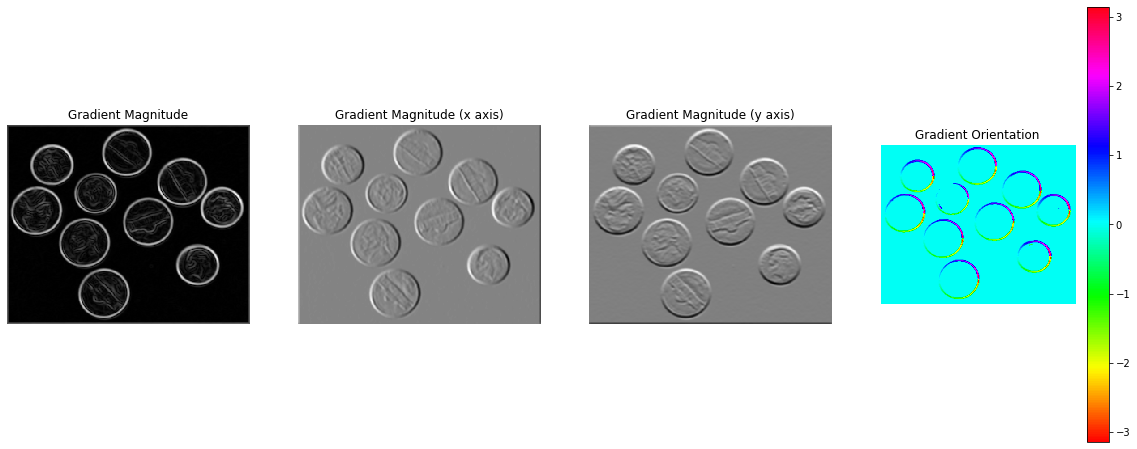

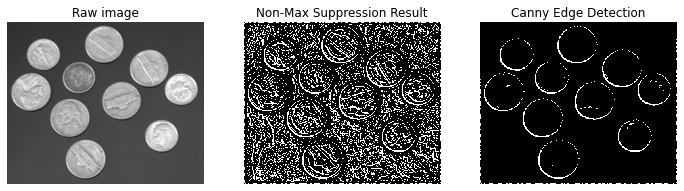

In [198]:
# tuning threshold for simple test images
image_folder = "/content/gdrive/MyDrive/CannyEdge/Code/Test_Images/"
save_folder = "/content/gdrive/MyDrive/CannyEdge/Code/Results/" # need to create this folder in the drive
filename='coins.png' # TODO: change image name 
I = np.array(Image.open(os.path.join(image_folder, filename)).convert('RGB'))
low, high = 95,100
E = cannyEdge(I, low, high)
pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')
# check the result in the folder
pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

## Tune the threshold for each images under "Image" folder

In [154]:
 # list all image names
 os.listdir('/content/gdrive/MyDrive/CannyEdge/Code/Images')

['201080.jpg',
 'I1.jpg',
 '86000.jpg',
 '189080.jpg',
 '22013.jpg',
 '135069.jpg',
 '118035.jpg',
 '55067.jpg',
 '3096.jpg',
 '21077.jpg',
 '48017.jpg',
 '16068.jpg']

2.5 0.15
[[False  True  True ... False False  True]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True False False ... False False  True]
 [ True False False ... False False  True]
 [False  True  True ... False False False]]
2.5 0.15
Shape Test Passed! 



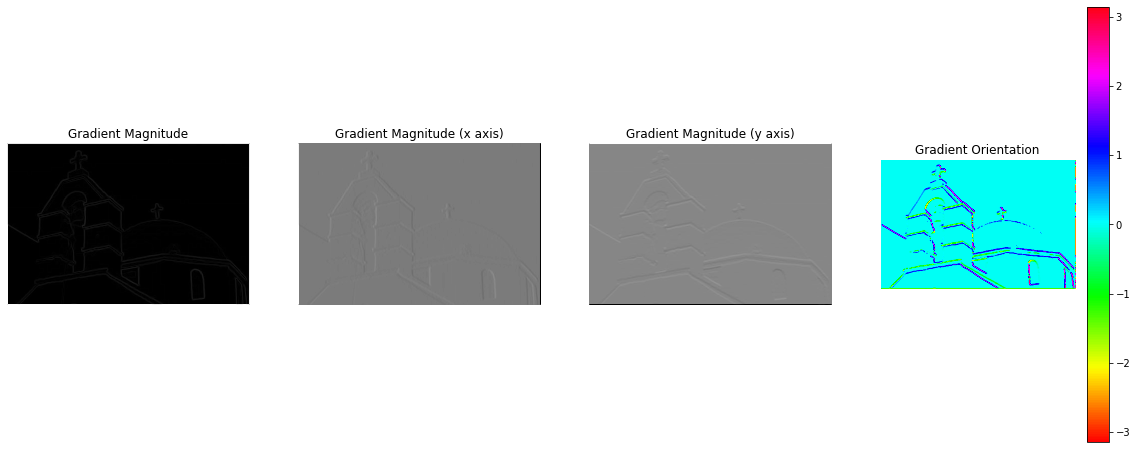

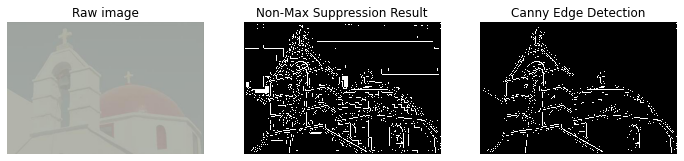

In [174]:
# tuning threshold for a single image
image_folder = "/content/gdrive/MyDrive/CannyEdge/Code/Images/"
save_folder = "/content/gdrive/MyDrive/CannyEdge/Code/Results" # need to create this folder in the drive
filename='118035.jpg' # TODO: change image name 
I = np.array(Image.open(os.path.join(image_folder, filename)).convert('RGB'))
# I =imread('/content/gdrive/MyDrive/CannyEdge/Code/Images/118035.jpg')
low, high = 0.15,2.5
E = cannyEdge(I, low, high)
pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')
# check the result in the folder
pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

In [127]:
print(np.amax(Mag))

40


# Fill in all tuned threshold to generate edge detection results


In [ ]:
# keep results for all images
image_folder = "Images"
save_folder = "Results"
# fill in the threshold (low, high) you have tuned in the cell above 
thresh_dict = {'118035.jpg': (0, 0),
                '135069.jpg': (0, 0),
                '16068.jpg': (0, 0),
                '189080.jpg': (0, 0),
                '201080.jpg': (0, 0),
                '21077.jpg': (0, 0),
                '22013.jpg': (0, 0),
                '3096.jpg': (0, 0),
                '48017.jpg': (0, 0),
                '55067.jpg': (0, 0),
                '86000.jpg': (0, 0),
                'I1.jpg': (0, 0)}
# generate results one by one
for filename in os.listdir(image_folder):
    # read in image 
    im_path = os.path.join(image_folder, filename)
    I = np.array(Image.open(im_path).convert('RGB'))

    low, high = thresh_dict[filename]
    E = cannyEdge(I, low, high)

    pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')

    pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))